In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,roc_curve
from sklearn.preprocessing import LabelBinarizer,StandardScaler

from sklearn import model_selection as cv
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt

from dbn.tensorflow import SupervisedDBNClassification
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.layers import Input,Dense,LSTM,GRU,BatchNormalization
from tensorflow.keras.layers import PReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error as MAE
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import tensorflow.keras as K
import tensorflow as tf

In [3]:
df = pd.read_csv('./dataset/combine/2.storke_combine_code_multi_balance.csv')
df

,NIHSS,original_shape_Elongation,original_firstorder_Skewness,original_glcm_SumSquares,original_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLH_glrlm_GrayLevelVariance,wavelet-LLH_glrlm_ShortRunEmphasis,wavelet-LLH_gldm_GrayLevelVariance,wavelet-LLH_glszm_GrayLevelNonUniformity,wavelet-LHL_firstorder_90Percentile,...,Drinkalcohol _1.0,Drinkalcohol _2.0,Drinkalcohol _nan,Drinkalcohol _-1,OCSP_4.0,OCSP_3.0,OCSP_2.0,OCSP_1.0,OCSP_nan,OCSP_-1
0,0,0.565605,0.470144,0.373676,0.029411,0.000000,0.431860,0.000000,0.160000,0.491783,...,1,0,0,0,0,1,0,0,0,0
1,0,0.451330,0.392714,0.068449,0.106469,0.000000,0.495983,0.000000,0.160000,0.497301,...,1,0,0,0,1,0,0,0,0,0
2,0,0.612372,0.851287,0.069507,0.273280,0.000000,0.863248,0.000000,0.160000,0.178226,...,1,0,0,0,1,0,0,0,0,0
3,0,0.489943,0.405634,0.313635,0.066088,0.000000,0.457018,0.000000,0.160000,0.372396,...,1,0,0,0,1,0,0,0,0,0
4,0,0.653883,0.291065,0.236634,0.056482,0.000000,0.203632,0.000000,0.160000,0.326073,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2,0.126109,0.447496,0.036365,0.934492,0.123367,0.062207,0.929336,0.104301,0.069522,...,1,0,0,0,0,0,1,0,0,0
622,2,0.458162,0.712629,0.361885,0.134446,0.498550,0.636870,0.061614,0.162788,0.234031,...,1,0,0,0,0,1,0,0,0,0
623,2,0.580937,0.412865,0.122301,0.643417,0.000000,0.273111,0.000198,0.488470,0.266404,...,1,0,0,0,0,0,1,0,0,0
624,2,0.311074,0.637602,0.023883,0.302411,0.000000,0.560780,0.223492,0.596927,0.070366,...,0,0,0,0,0,0,1,0,0,0


In [4]:
Y = np.array(df.pop('NIHSS'))
X = np.array(df)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,random_state = 3)

In [7]:
x_train.shape

(438, 90)

In [9]:
x_test.shape

(188, 90)

In [6]:
Class = [0,1,2]
Class_dict = dict(zip(Class, range(len(Class))))
Class_dict
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
y_train_labels = lb.transform(y_train)

In [7]:
def Predict(X):
    RNN_test_label = []
    Class = [0,1,2]
    Class_dict = dict(zip(Class, range(len(Class))))
    Class_dict
    for i in range(0,X.shape[0]):
        RNN_test_label.append(Class_dict[np.argmax(X[i])])
    RNN_test_label = np.array(RNN_test_label,dtype = 'int64')
    return RNN_test_label

<font color=#0099ff  size=5 face="黑体">方法1：Decision Tree</font>

In [8]:
DT_classifier = tree.DecisionTreeClassifier(max_depth=3)
DT_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
DT_train_pred = DT_classifier.predict(x_train)
DT_test_pred = DT_classifier.predict(x_test)

In [10]:
DT_train_acc = accuracy_score(y_train, DT_train_pred)  
DT_test_acc = accuracy_score(y_test, DT_test_pred)  
DT_train_acc,DT_test_acc 

(0.7785388127853882, 0.7553191489361702)

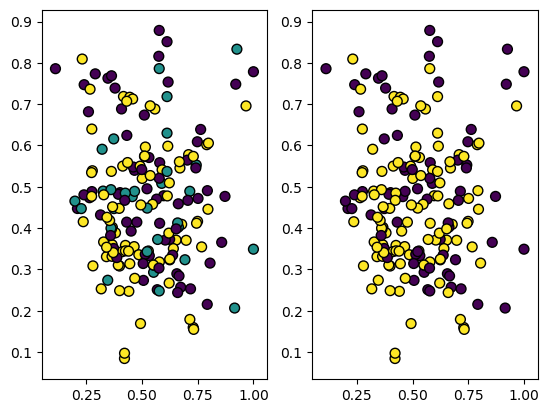

In [11]:
plt.figure()
plt.subplot(121)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.reshape((-1)), edgecolors='k', s=50)
plt.subplot(122)
plt.scatter(x_test[:, 0], x_test[:, 1], c=DT_test_pred.reshape((-1)), edgecolors='k', s=50)
plt.show()

In [12]:
DT_scores = cross_val_score(DT_classifier, X, Y, cv=5)  #cv为迭代次数。
print(DT_scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.2f (+/- %0.2f)" % (DT_scores.mean(), DT_scores.std() * 2)) 

[0.78571429 0.808      0.76       0.752      0.744     ]
Accuracy: 0.77 (+/- 0.05)


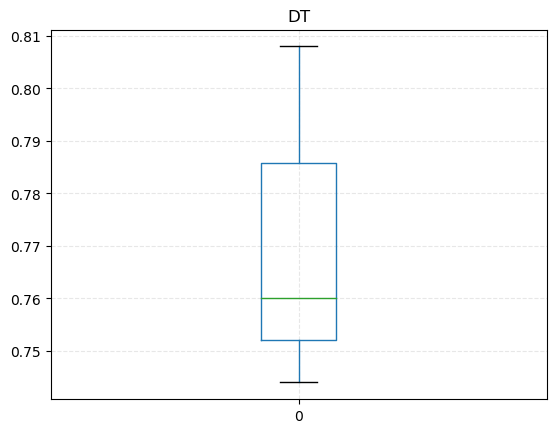

In [13]:
df = pd.DataFrame(DT_scores)
df.plot.box(title="DT")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

<font color=#0099ff  size=5 face="黑体">方法2：SVM 支持向量机</font>

训练集: 0.8744292237442922
测试集: 0.824468085106383


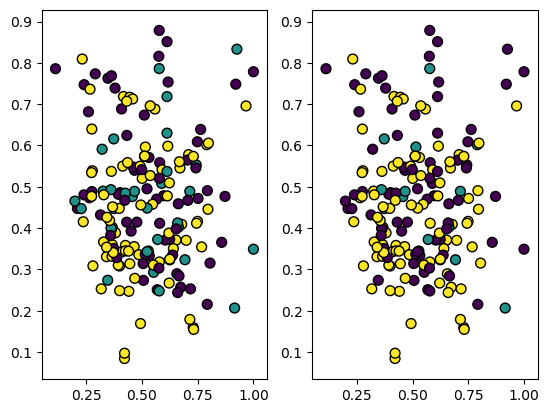

In [14]:
SVM_classifier = svm.SVC(C=1.0, kernel='rbf', decision_function_shape='ovr', gamma=0.01)
SVM_classifier.fit(x_train, y_train)

print("训练集:", SVM_classifier.score(x_train, y_train))
print("测试集:", SVM_classifier.score(x_test, y_test))
SVM_train_pred = SVM_classifier.predict(x_train)
SVM_test_pred = SVM_classifier.predict(x_test)
# comp = zip(y_test, SVM_test_predict)

plt.figure()
plt.subplot(121)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.reshape((-1)), edgecolors='k', s=50)
plt.subplot(122)
plt.scatter(x_test[:, 0], x_test[:, 1], c=SVM_test_pred.reshape((-1)), edgecolors='k', s=50)
plt.show()

In [15]:
SVM_scores = cross_val_score(SVM_classifier, X, Y, cv=5)  #cv为迭代次数。
print(SVM_scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.2f (+/- %0.2f)" % (SVM_scores.mean(), SVM_scores.std() * 2)) 

[0.8015873 0.88      0.84      0.888     0.856    ]
Accuracy: 0.85 (+/- 0.06)


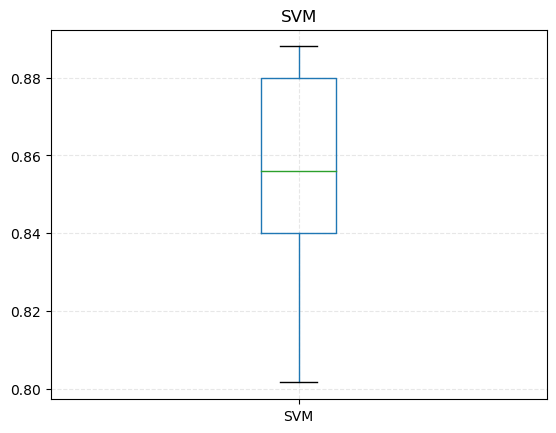

In [16]:
svm_data = {'SVM':SVM_scores }
df = pd.DataFrame(svm_data)
df.plot.box(title="SVM")
plt.grid(linestyle="--", alpha=0.3)
plt.show()

<font color=#0099ff  size=5 face="黑体">方法3：RF随机森林</font>

In [17]:
RF_classifier = RandomForestClassifier(criterion="gini",random_state=1)
RF_classifier.fit(x_train, y_train)
acu_test = RF_classifier.score(x_test, y_test)
acu_train = RF_classifier.score(x_train, y_train)
RF_train_pred = RF_classifier.predict(x_train)
RF_test_pred = RF_classifier.predict(x_test)
print(acu_train,acu_test)

0.9954337899543378 0.8776595744680851


In [18]:
PFacc = accuracy_score(y_test,RF_test_pred)
PFacc

0.8776595744680851

In [19]:
RF_scores = cross_val_score(RF_classifier, X, Y, cv=5)  #cv为迭代次数。
print(RF_scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.2f (+/- %0.2f)" % (RF_scores.mean(), RF_scores.std() * 2)) 

[0.86507937 0.904      0.872      0.92       0.928     ]
Accuracy: 0.90 (+/- 0.05)


<font color=#0099ff  size=5 face="黑体">方法4：DNN </font>

In [20]:
def buildDNN(layer1,layer2,n_class):
    init = K.initializers.glorot_uniform(seed=1)
    simple_adam = tf.keras.optimizers.Adam()
    model = K.models.Sequential()
    model.add(K.layers.Dense(units=layer1, input_dim=90, kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=layer2, kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=n_class, kernel_initializer=init, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=simple_adam, metrics=['accuracy'])
    model.summary()
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                910       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,053
Trainable params: 1,053
Non-trainable params: 0
_________________________________________________________________


In [21]:
b_size = 35
max_epochs = 500
print("Starting training ")
dnn.fit(x_train, y_train_labels, batch_size=b_size, epochs=max_epochs, shuffle=True, verbose=1)

Starting training 
Train on 438 samples
Epoch 1/500
438/438 [==============================] - 0s 352us/sample - loss: 1.1048 - acc: 0.4612
Epoch 2/500
438/438 [==============================] - 0s 16us/sample - loss: 1.0725 - acc: 0.4612
Epoch 3/500
438/438 [==============================] - 0s 23us/sample - loss: 1.0431 - acc: 0.4612
Epoch 4/500
438/438 [==============================] - 0s 18us/sample - loss: 1.0164 - acc: 0.4612
Epoch 5/500
438/438 [==============================] - 0s 18us/sample - loss: 0.9919 - acc: 0.4566
Epoch 6/500
438/438 [==============================] - 0s 16us/sample - loss: 0.9647 - acc: 0.4817
Epoch 7/500
438/438 [==============================] - 0s 23us/sample - loss: 0.9369 - acc: 0.5297
Epoch 8/500
438/438 [==============================] - 0s 16us/sample - loss: 0.9005 - acc: 0.5845
Epoch 9/500
438/438 [==============================] - 0s 18us/sample - loss: 0.8523 - acc: 0.6781
Epoch 10/500
438/438 [==============================] - 0s 18us/samp

In [22]:
dnn_train_Pred = dnn.predict(x_train)
dnn_train_pred =Predict(dnn_train_Pred)
dnn_test_Pred = dnn.predict(x_test)
dnn_test_pred =Predict(dnn_test_Pred)

C:\Users\Administrator\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [23]:
dnn_train_acc =  accuracy_score(y_train, dnn_train_pred)
dnn_test_acc = accuracy_score(y_test, dnn_test_pred)
print("Dnn training with laryer  train score: {}".format(dnn_train_acc))
print("Dnn training with laryer  test score: {}".format(dnn_test_acc))

Dnn training with laryer  train score: 1.0
Dnn training with laryer  test score: 0.8882978723404256


<font color=#0099ff  size=5 face="黑体">方法5：DBN </font>

In [24]:
# cantidad de neuronas ocultas 
hidden_layers = []
for val in dbn_cant_neuronas_capas_ocultas.split(','):
      hidden_layers.append( int(val))

dbn = SupervisedDBNClassification(hidden_layers_structure = hidden_layers,
                                                learning_rate_rbm=0.05,
                                                learning_rate=0.1,
                                                n_epochs_rbm=RBM_cant_epocas_entrenamiento,
                                                n_iter_backprop=Backprop_cant_epocas_entrenamiento,
                                                batch_size=32,
                                                activation_function='relu',
                                                dropout_p=0.2)

In [25]:
dbn.fit(x_train, y_train)

[START] Pre-training step:
Instructions for updating:
Use `tf.cast` instead.
>> Epoch 1 finished 	RBM Reconstruction error 9.404961
>> Epoch 2 finished 	RBM Reconstruction error 9.853636
>> Epoch 3 finished 	RBM Reconstruction error 9.398053
>> Epoch 4 finished 	RBM Reconstruction error 9.552413
>> Epoch 5 finished 	RBM Reconstruction error 9.569064
>> Epoch 6 finished 	RBM Reconstruction error 9.039717
>> Epoch 7 finished 	RBM Reconstruction error 9.044134
>> Epoch 8 finished 	RBM Reconstruction error 9.286039
>> Epoch 9 finished 	RBM Reconstruction error 9.206835
>> Epoch 10 finished 	RBM Reconstruction error 9.047352
>> Epoch 11 finished 	RBM Reconstruction error 8.834146
>> Epoch 12 finished 	RBM Reconstruction error 8.532873
>> Epoch 13 finished 	RBM Reconstruction error 8.435234
>> Epoch 14 finished 	RBM Reconstruction error 8.222644
>> Epoch 15 finished 	RBM Reconstruction error 8.344939
>> Epoch 16 finished 	RBM Reconstruction error 8.173334
>> Epoch 17 finished 	RBM Reconstruc

SupervisedDBNClassification(batch_size=32, dropout_p=0.2,
                            idx_to_label_map={0: 0, 1: 1, 2: 2},
                            l2_regularization=1.0,
                            label_to_idx_map={0: 0, 1: 1, 2: 2},
                            learning_rate=0.1, n_iter_backprop=500,
                            verbose=True)

In [26]:
dbn_train_pred =dbn.predict(x_train)
dbn_test_pred =dbn.predict(x_test)

In [27]:
print(np.isnan(dbn_test_pred ).any())

False


In [28]:
dbn_train_acc =  accuracy_score(y_train, dbn_train_pred)
dbn_test_acc = accuracy_score(y_test, dbn_test_pred)
print("dbn training train score: {}".format(dbn_train_acc))
print("dbn training test score: {}".format(dbn_test_acc))

dbn training train score: 0.9885844748858448
dbn training test score: 0.9095744680851063


<font color=#0099ff  size=5 face="黑体">方法6：LSTM-RNN</font>

In [29]:
def buildLSTM(timeStep,inputColNum,outStep,learnRate=1e-4):
    '''
    搭建LSTM网络，激活函数为tanh
    timeStep：输入时间步
    inputColNum：输入列数
    outStep：输出时间步
    learnRate：学习率    
    '''
    #输入层
    inputLayer = Input(shape=(timeStep,inputColNum))

    #中间层
    middle = LSTM(activation='tanh')(inputLayer)
    middle = Dense(activation='tanh')(middle)

    #输出层 全连接
    outputLayer = Dense(outStep)(middle)
    
    #建模
    model = Model(inputs=inputLayer,outputs=outputLayer)
    optimizer = Adam(learning_rate=learnRate)
    model.compile(optimizer=optimizer,loss='mse') 
    model.summary()
    return model

#搭建LSTM
lstm = buildLSTM(timeStep=1,inputColNum=90,outStep=3,learnRate=1e-4)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 90)]           0         
                                                                 
 lstm (LSTM)                 (None, 10)                4040      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 3)                 33        
                                                                 
Total params: 4,183
Trainable params: 4,183
Non-trainable params: 0
_________________________________________________________________


In [30]:
x_train_lstm = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_test_lstm = x_test.reshape(x_test.shape[0],1,x_test.shape[1])

In [31]:
lstm.fit(x_train_lstm,y_train_labels,epochs=epochs,verbose=1,batch_size=batchSize) 

Train on 438 samples
Epoch 1/500
438/438 [==============================] - 0s 597us/sample - loss: 0.3013
Epoch 2/500
438/438 [==============================] - 0s 31us/sample - loss: 0.2829
Epoch 3/500
438/438 [==============================] - 0s 27us/sample - loss: 0.2681
Epoch 4/500
438/438 [==============================] - 0s 30us/sample - loss: 0.2570
Epoch 5/500
438/438 [==============================] - 0s 32us/sample - loss: 0.2483
Epoch 6/500
438/438 [==============================] - 0s 32us/sample - loss: 0.2419
Epoch 7/500
438/438 [==============================] - 0s 32us/sample - loss: 0.2368
Epoch 8/500
438/438 [==============================] - 0s 27us/sample - loss: 0.2328
Epoch 9/500
438/438 [==============================] - 0s 30us/sample - loss: 0.2294
Epoch 10/500
438/438 [==============================] - 0s 30us/sample - loss: 0.2265
Epoch 11/500
438/438 [==============================] - 0s 30us/sample - loss: 0.2238
Epoch 12/500
438/438 [===================

In [32]:
def Predict(X):
    RNN_test_label = []
    Class = [0,1,2]
    Class_dict = dict(zip(Class, range(len(Class))))
    Class_dict
    for i in range(0,X.shape[0]):
        RNN_test_label.append(Class_dict[np.argmax(X[i])])
    RNN_test_label = np.array(RNN_test_label,dtype = 'int64')
    return RNN_test_label

In [33]:
LSTM_train_Pred = lstm.predict(x_train_lstm)
LSTM_train_pred =Predict(LSTM_train_Pred)
LSTM_test_Pred = lstm.predict(x_test_lstm)
LSTM_test_pred =Predict(LSTM_test_Pred)

C:\Users\Administrator\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [34]:
LSTM_train_acc =  accuracy_score(y_train, LSTM_train_pred)
LSTM_test_acc = accuracy_score(y_test, LSTM_test_pred)
print("RNN training with laryer  train score: {}".format(LSTM_train_acc))
print("RNN training with laryer  test score: {}".format(LSTM_test_acc))

RNN training with laryer  train score: 0.9657534246575342
RNN training with laryer  test score: 0.9148936170212766


<font color=#0099ff  size=5 face="黑体">方法7：ensemble</font>

In [35]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostClassifier


ADmodel_1 = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3), n_estimators=30)
ADmodel_1.fit(x_train,y_train)
ADmodel_1_train_pred = ADmodel_1.predict(x_train)
ADmodel_1_test_pred = ADmodel_1.predict(x_test)

In [36]:
print(accuracy_score(y_train, ADmodel_1_train_pred) )
print(accuracy_score(y_test, ADmodel_1_test_pred) )

1.0
0.8829787234042553


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostClassifier

SVM = svm.SVC(kernel="linear", decision_function_shape="ovr")
ADmodel_2 = AdaBoostClassifier()
ADmodel_2.fit(x_train,y_train)
ADmodel_2_train_pred = ADmodel_2.predict(x_train)
ADmodel_2_test_pred = ADmodel_2.predict(x_test)

In [38]:
print(accuracy_score(y_train,ADmodel_2_train_pred))
print(accuracy_score(y_test, ADmodel_2_test_pred) )

0.9246575342465754
0.7872340425531915


# 结果导出

In [39]:
DTing = []
DTing.append(y_train)
DTing.append(DT_train_pred)
DTing.append(y_test)
DTing.append(DT_test_pred)
test = pd.DataFrame(data=DTing,index = ['y_train','ytrain_pred','y_test','ytest_pred'])
test.to_csv(r'./dataset/test/DTinging_combine_multi.csv',encoding='gbk')

In [40]:
SVMing = []
SVMing.append(y_train)
SVMing.append(SVM_train_pred)
SVMing.append(y_test)
SVMing.append(SVM_test_pred)
test = pd.DataFrame(data=SVMing,index = ['y_train','ytrain_pred','y_test','ytest_pred'])
test.to_csv(r'./dataset/test/SVMinging_combine_multi.csv',encoding='gbk')

In [41]:
RFing = []
RFing.append(y_train)
RFing.append(RF_train_pred)
RFing.append(y_test)
RFing.append(RF_test_pred)
test = pd.DataFrame(data=RFing,index = ['y_train','ytrain_pred','y_test','ytest_pred'])
test.to_csv(r'./dataset/test/RFinging_combine_multi.csv',encoding='gbk')

In [42]:
DNNing = []
DNNing.append(y_train)
DNNing.append(dnn_train_pred)
DNNing.append(y_test)
DNNing.append(dnn_test_pred)
test = pd.DataFrame(data=DNNing,index = ['y_train','ytrain_pred','y_test','ytest_pred'])
test.to_csv(r'./dataset/test/DNNinging_clinical_multi.csv',encoding='gbk')

In [43]:
LSTMing = []
LSTMing.append(y_train)
LSTMing.append(LSTM_train_pred)
LSTMing.append(y_test)
LSTMing.append(LSTM_test_pred)
test = pd.DataFrame(data=LSTMing,index = ['y_train','ytrain_pred','y_test','ytest_pred'])
test.to_csv(r'./dataset/test/LSTMinging_clinical_multi.csv',encoding='gbk')

In [44]:
DBNing = []
DBNing.append(y_train)
DBNing.append(dbn_train_pred)
DBNing.append(y_test)
DBNing.append(dbn_test_pred)
test = pd.DataFrame(data=DBNing,index = ['y_train','ytrain_pred','y_test','ytest_pred'])
test.to_csv(r'./dataset/test/DBNinging_clinical_multi.csv',encoding='gbk')